# This notebook analyzes the accident dataset of Germany (https://unfallatlas.statistikportal.de/). The data contains information about accidents in 16 Federal states of Germany for the year 2021. It has 25 different fields. 
## The metdata information is available in the pdf.

## Reading csv data with pandas

In [1]:
import warnings
warnings.filterwarnings('ignore')


In [2]:
import pandas as pd

data=pd.read_csv("acc_data/Unfallorte2021_EPSG25832_CSV/Unfallorte2021_LinRef.csv",sep=";",decimal=',')
data

OBJECTID           UIDENTSTLAE  ULAND  UREGBEZ  UKREIS  UGEMEINDE  \
0              1   1210308125013512021      1        0      54        165   
1              2   1210608134013112021      1        0       2          0   
2              3   1210610181013902021      1        0      61          7   
3              4   1210524161013132021      1        0      53         41   
4              5   1210529152013382022      1        0      55         32   
...          ...                   ...    ...      ...     ...        ...   
233203    233204  16211215001601745520     16        0      73         77   
233204    233205  16211229001201769640     16        0      52          0   
233205    233206  16211220001401756840     16        0      53          0   
233206    233207  16211223001509758540     16        0      65         86   
233207    233208  16211218001208747380     16        0      77         43   

        UJAHR  UMONAT  USTUNDE  UWOCHENTAG  ...  IstRad  IstPKW  IstFuss  \
0        2021       3        7           2  ...       0       1        0   
1        2021       6       15           3  ...       0       1        0   
2        2021       6       13           5  ...       1       0        0   
3        2021       5       11           2  ...       1       0        0   
4        2021       5       15           7  ...       1       1        0   
...       ...     ...      ...         ...  ...     ...     ...      ...   
233203   2021      12       11           4  ...       1       0        0   
233204   2021      12        8           4  ...       0       1        0   
233205   2021      12       12           2  ...       0       1        1   
233206   2021      12       10           5  ...       0       1        0   
233207   2021      12       18           7  ...       0       1        0   

        IstKrad  IstGkfz  IstSonstige        LINREFX       LINREFY  XGCSWGS84  \
0             0        0            0  483995.394384  6.069091e+06   8.751233   
1             0        0            0  573010.098061  6.020091e+06  10.122558   
2             0        0            1  527231.388501  5.972658e+06   9.414457   
3             0        0            0  614902.973625  5.963897e+06  10.745101   
4             0        0            0  617331.180263  5.996138e+06  10.794357   
...         ...      ...          ...            ...           ...        ...   
233203        0        0            0  667716.357000  5.613648e+06  11.372512   
233204        0        0            0  716678.031692  5.637572e+06  12.078252   
233205        0        0            0  681465.629001  5.644593e+06  11.582086   
233206        0        0            1  659448.267240  5.693630e+06  11.290802   
233207        0        0            0  727955.240001  5.648104e+06  12.244767   

        YGCSWGS84  
0       54.768787  
1       54.323450  
2       53.901645  
3       53.810913  
4       54.100018  
...           ...  
233203  50.650516  
233204  50.849210  
233205  50.924402  
233206  51.371509  
233207  50.939436  

[233208 rows x 25 columns]

## Printing information about a DataFrame including the index dtype and columns, non-null values and memory usage.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233208 entries, 0 to 233207
Data columns (total 25 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   OBJECTID     233208 non-null  int64  
 1   UIDENTSTLAE  233208 non-null  object 
 2   ULAND        233208 non-null  int64  
 3   UREGBEZ      233208 non-null  int64  
 4   UKREIS       233208 non-null  int64  
 5   UGEMEINDE    233208 non-null  int64  
 6   UJAHR        233208 non-null  int64  
 7   UMONAT       233208 non-null  int64  
 8   USTUNDE      233208 non-null  int64  
 9   UWOCHENTAG   233208 non-null  int64  
 10  UKATEGORIE   233208 non-null  int64  
 11  UART         233208 non-null  int64  
 12  UTYP1        233208 non-null  int64  
 13  ULICHTVERH   233208 non-null  int64  
 14  USTRZUSTAND  233208 non-null  int64  
 15  IstRad       233208 non-null  int64  
 16  IstPKW       233208 non-null  int64  
 17  IstFuss      233208 non-null  int64  
 18  IstKrad      233208 non-

## Checking for null values

In [4]:
data.isnull().sum().any()

False

##  Conclusion: False means no null values present in the dataset

# Next, we show various analysis of accident dataset

## 1. Which German states has highest number accidents in 2021 ?

In [5]:
data_accident_count_per_state=data.groupby(['ULAND']).size().reset_index(name='accident_count')
data_accident_count_per_state

ULAND  accident_count
0       1           10034
1       2            6246
2       3           24253
3       4            2300
4       5           49004
5       6           15579
6       7           10993
7       8           27017
8       9           40771
9      10            2741
10     11           11267
11     12            7563
12     13            4251
13     14           10701
14     15            6029
15     16            4459

## ULAND id has mapping to Federal states and given in the metadata pdf. 
## Creating a dictionary corrsponding to the states.

In [6]:
states={1:"Schleswig-Holstein",2: "Hamburg",3:"Niedersachsen",4:"Bremen",5:"Nordrhein-Westfalen",6:"Hessen",7:"Rheinland-Pfalz",
8:"Baden-Württemberg",9:"Bayern",10:"Saarland",11:"Berlin",12:"Brandenburg",13:"Mecklenburg-Vorpommern",14:"Sachsen",
15:"Sachsen-Anhalt",16:"Thüringen"} 

In [7]:
states_df=pd.DataFrame(states.items(), columns=['ULAND', 'states'])

In [8]:
states_df

ULAND                  states
0       1      Schleswig-Holstein
1       2                 Hamburg
2       3           Niedersachsen
3       4                  Bremen
4       5     Nordrhein-Westfalen
5       6                  Hessen
6       7         Rheinland-Pfalz
7       8       Baden-Württemberg
8       9                  Bayern
9      10                Saarland
10     11                  Berlin
11     12             Brandenburg
12     13  Mecklenburg-Vorpommern
13     14                 Sachsen
14     15          Sachsen-Anhalt
15     16               Thüringen

##  Joining two dataframes based on ULAND field

In [9]:
state_df_merged=pd.merge(data_accident_count_per_state,states_df,on="ULAND")

In [10]:
state_df_merged.head()

ULAND  accident_count               states
0      1           10034   Schleswig-Holstein
1      2            6246              Hamburg
2      3           24253        Niedersachsen
3      4            2300               Bremen
4      5           49004  Nordrhein-Westfalen

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

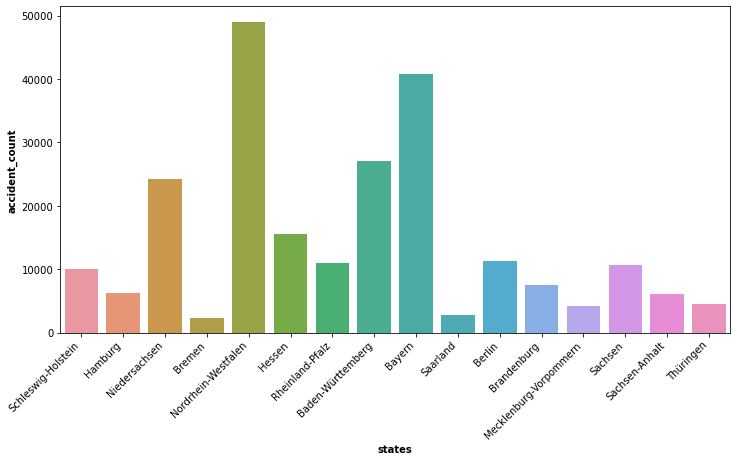

In [11]:
import seaborn as sns
plt.figure(figsize=(12, 6))

bar=sns.barplot(data=state_df_merged, x="states", y="accident_count")
# ax = state_df_merged.plot.bar(x='states', y='accident_count')
bar.set_xticklabels(bar.get_xticklabels(), rotation=45, horizontalalignment='right')
bar.set_xlabel(bar.get_xlabel(), fontdict={'weight': 'bold'})
bar.set_ylabel(bar.get_ylabel(), fontdict={'weight': 'bold'})

plt.show()

## NRW and Bayern are the most accident prone states in Germany in 2021. These two stated also most populated states in Germany (https://www.statista.com/statistics/1127686/population-by-federal-state-germany/#:~:text=The%20most%20populated%20federal%20state,rounded%20up%20the%20top%20three.)

# 2. Accidents leading to death

In [12]:
data_death=data.loc[data["UKATEGORIE"]==1]
data_death

OBJECTID           UIDENTSTLAE  ULAND  UREGBEZ  UKREIS  UGEMEINDE  \
71            72   1210520125013042021      1        0      59        107   
216          217   1210330134013052021      1        0      57         62   
315          316   1210531171013292021      1        0      56          2   
328          329   1210131125013302021      1        0      54         88   
406          407   1210530105132432021      1        0      53        126   
...          ...                   ...    ...      ...     ...        ...   
232660    232661  16210803001701590060     16        0      54          0   
232706    232707  16210809001208576130     16        0      77          9   
232871    232872  16210801001701558370     16        0      54          0   
232957    232958  16211118001501728610     16        0      62         41   
232983    232984  16210821001701601860     16        0      66         92   

        UJAHR  UMONAT  USTUNDE  UWOCHENTAG  ...  IstRad  IstPKW  IstFuss  \
71       2021       5       13           5  ...       0       1        0   
216      2021       3       23           3  ...       0       1        0   
315      2021       5        9           2  ...       1       0        0   
328      2021       1       11           1  ...       0       1        0   
406      2021       5       19           1  ...       0       1        0   
...       ...     ...      ...         ...  ...     ...     ...      ...   
232660   2021       8       11           3  ...       0       0        1   
232706   2021       8        9           2  ...       0       0        0   
232871   2021       8       14           1  ...       1       0        0   
232957   2021      11       10           5  ...       0       0        1   
232983   2021       8       18           7  ...       1       0        0   

        IstKrad  IstGkfz  IstSonstige        LINREFX       LINREFY  XGCSWGS84  \
71            0        0            1  522711.560126  6.051467e+06   9.351642   
216           0        0            0  583207.057582  6.011977e+06  10.277043   
315           0        1            0  549999.701246  5.960880e+06   9.759043   
328           0        1            0  484954.033514  6.075082e+06   8.765823   
406           0        0            0  607495.674782  5.934927e+06  10.622616   
...         ...      ...          ...            ...           ...        ...   
232660        0        1            0  621173.072846  5.607997e+06  10.712639   
232706        0        0            1  733024.760507  5.649613e+06  12.317764   
232871        0        0            0  620716.614584  5.606331e+06  10.705648   
232957        0        1            0  624556.018284  5.707123e+06  10.794551   
232983        0        1            0  616388.962708  5.613458e+06  10.646766   

        YGCSWGS84  
71      54.610148  
216     54.248984  
315     53.794092  
328     54.822655  
406     53.552210  
...           ...  
232660  50.611260  
232706  50.950952  
232871  50.596379  
232957  51.501503  
232983  50.661326  

[2252 rows x 25 columns]

## %age of accidents leads to death

In [13]:
(len(data_death)/len(data))*100


0.9656615553497307

# Conclusion: Less than 1 % accidents leads to death in Germany in 2021.

# 3. Which season causes more accidents

In [14]:
def fetachseason(month):
    if month>=3 and month<=5:
        return "Spring"
    if month>=6 and month<=8:
        return "Summer"
    if month>=9 and month<=11:
        return "Autumn"
    if month==12 or month==1 or month== 2:
        return "Winter"

In [15]:
data['season'] = data.apply(lambda row: fetachseason(row['UMONAT']), axis=1)
data

OBJECTID           UIDENTSTLAE  ULAND  UREGBEZ  UKREIS  UGEMEINDE  \
0              1   1210308125013512021      1        0      54        165   
1              2   1210608134013112021      1        0       2          0   
2              3   1210610181013902021      1        0      61          7   
3              4   1210524161013132021      1        0      53         41   
4              5   1210529152013382022      1        0      55         32   
...          ...                   ...    ...      ...     ...        ...   
233203    233204  16211215001601745520     16        0      73         77   
233204    233205  16211229001201769640     16        0      52          0   
233205    233206  16211220001401756840     16        0      53          0   
233206    233207  16211223001509758540     16        0      65         86   
233207    233208  16211218001208747380     16        0      77         43   

        UJAHR  UMONAT  USTUNDE  UWOCHENTAG  ...  IstPKW  IstFuss  IstKrad  \
0        2021       3        7           2  ...       1        0        0   
1        2021       6       15           3  ...       1        0        0   
2        2021       6       13           5  ...       0        0        0   
3        2021       5       11           2  ...       0        0        0   
4        2021       5       15           7  ...       1        0        0   
...       ...     ...      ...         ...  ...     ...      ...      ...   
233203   2021      12       11           4  ...       0        0        0   
233204   2021      12        8           4  ...       1        0        0   
233205   2021      12       12           2  ...       1        1        0   
233206   2021      12       10           5  ...       1        0        0   
233207   2021      12       18           7  ...       1        0        0   

        IstGkfz  IstSonstige        LINREFX       LINREFY  XGCSWGS84  \
0             0            0  483995.394384  6.069091e+06   8.751233   
1             0            0  573010.098061  6.020091e+06  10.122558   
2             0            1  527231.388501  5.972658e+06   9.414457   
3             0            0  614902.973625  5.963897e+06  10.745101   
4             0            0  617331.180263  5.996138e+06  10.794357   
...         ...          ...            ...           ...        ...   
233203        0            0  667716.357000  5.613648e+06  11.372512   
233204        0            0  716678.031692  5.637572e+06  12.078252   
233205        0            0  681465.629001  5.644593e+06  11.582086   
233206        0            1  659448.267240  5.693630e+06  11.290802   
233207        0            0  727955.240001  5.648104e+06  12.244767   

        YGCSWGS84  season  
0       54.768787  Spring  
1       54.323450  Summer  
2       53.901645  Summer  
3       53.810913  Spring  
4       54.100018  Spring  
...           ...     ...  
233203  50.650516  Winter  
233204  50.849210  Winter  
233205  50.924402  Winter  
233206  51.371509  Winter  
233207  50.939436  Winter  

[233208 rows x 26 columns]

In [16]:
data_season=data.groupby(['season']).size().reset_index(name='accident_count')
data_season

season  accident_count
0  Autumn           69300
1  Spring           48936
2  Summer           73679
3  Winter           41293

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

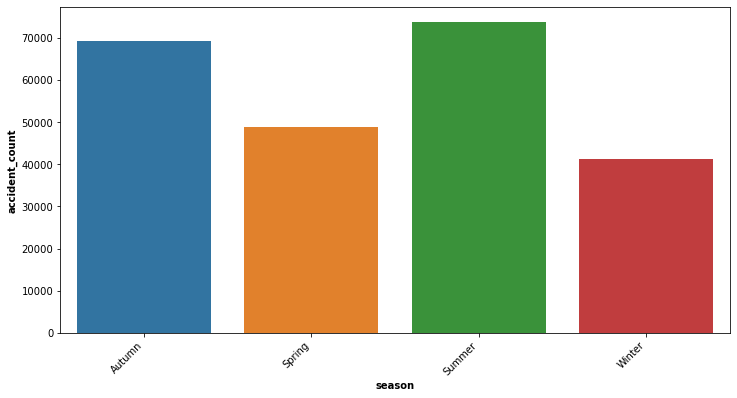

In [17]:
plt.figure(figsize=(12, 6))

bar_season=sns.barplot(data=data_season, x="season", y="accident_count")
# ax = state_df_merged.plot.bar(x='states', y='accident_count')
bar_season.set_xticklabels(bar_season.get_xticklabels(), rotation=45, horizontalalignment='right')
bar_season.set_xlabel(bar_season.get_xlabel(), fontdict={'weight': 'bold'})
bar_season.set_ylabel(bar_season.get_ylabel(), fontdict={'weight': 'bold'})

plt.show()
#ax = data_season.plot.bar(x='season', y='accident_count', rot=1)
#plt.xticks(rotation=90)

# Conclusion: People tend to go out in summer (holidays etc.) more which could be the reason for more accidents

# 4. Which time of the day is more dangerous?

## Divide the day into four parts:- Morning, Afternoon, Evening and Night.

In [18]:
def getDay(stunde):        
    if stunde>=6 and stunde<=11 :
        return "morning"
    if  stunde>=12 and stunde<=15 :
        return "Afternoon"
    if  stunde>=16 and stunde<=18:
        return "Evening";
    if stunde>=19 and stunde<=23  or (stunde>=0 and stunde<6):
        return "Night"

In [19]:
data['day'] = data.apply(lambda row: getDay(row['USTUNDE']), axis=1)
data

OBJECTID           UIDENTSTLAE  ULAND  UREGBEZ  UKREIS  UGEMEINDE  \
0              1   1210308125013512021      1        0      54        165   
1              2   1210608134013112021      1        0       2          0   
2              3   1210610181013902021      1        0      61          7   
3              4   1210524161013132021      1        0      53         41   
4              5   1210529152013382022      1        0      55         32   
...          ...                   ...    ...      ...     ...        ...   
233203    233204  16211215001601745520     16        0      73         77   
233204    233205  16211229001201769640     16        0      52          0   
233205    233206  16211220001401756840     16        0      53          0   
233206    233207  16211223001509758540     16        0      65         86   
233207    233208  16211218001208747380     16        0      77         43   

        UJAHR  UMONAT  USTUNDE  UWOCHENTAG  ...  IstFuss  IstKrad  IstGkfz  \
0        2021       3        7           2  ...        0        0        0   
1        2021       6       15           3  ...        0        0        0   
2        2021       6       13           5  ...        0        0        0   
3        2021       5       11           2  ...        0        0        0   
4        2021       5       15           7  ...        0        0        0   
...       ...     ...      ...         ...  ...      ...      ...      ...   
233203   2021      12       11           4  ...        0        0        0   
233204   2021      12        8           4  ...        0        0        0   
233205   2021      12       12           2  ...        1        0        0   
233206   2021      12       10           5  ...        0        0        0   
233207   2021      12       18           7  ...        0        0        0   

        IstSonstige        LINREFX       LINREFY  XGCSWGS84  YGCSWGS84  \
0                 0  483995.394384  6.069091e+06   8.751233  54.768787   
1                 0  573010.098061  6.020091e+06  10.122558  54.323450   
2                 1  527231.388501  5.972658e+06   9.414457  53.901645   
3                 0  614902.973625  5.963897e+06  10.745101  53.810913   
4                 0  617331.180263  5.996138e+06  10.794357  54.100018   
...             ...            ...           ...        ...        ...   
233203            0  667716.357000  5.613648e+06  11.372512  50.650516   
233204            0  716678.031692  5.637572e+06  12.078252  50.849210   
233205            0  681465.629001  5.644593e+06  11.582086  50.924402   
233206            1  659448.267240  5.693630e+06  11.290802  51.371509   
233207            0  727955.240001  5.648104e+06  12.244767  50.939436   

        season        day  
0       Spring    morning  
1       Summer  Afternoon  
2       Summer  Afternoon  
3       Spring    morning  
4       Spring  Afternoon  
...        ...        ...  
233203  Winter    morning  
233204  Winter    morning  
233205  Winter  Afternoon  
233206  Winter    morning  
233207  Winter    Evening  

[233208 rows x 27 columns]

In [20]:
data_day=data.groupby(['day']).size().reset_index(name='accident_count')
data_day

day  accident_count
0  Afternoon           72091
1    Evening           55683
2      Night           40870
3    morning           64564

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

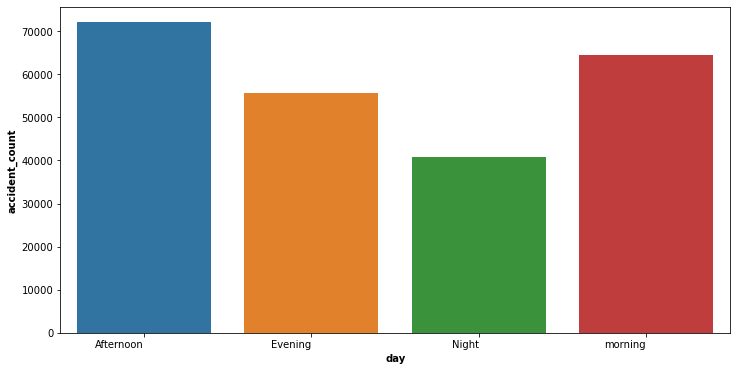

In [21]:
plt.figure(figsize=(12, 6))

bar_day=sns.barplot(data=data_day, x="day", y="accident_count")
# ax = state_df_merged.plot.bar(x='states', y='accident_count')
bar_day.set_xticklabels(bar_day.get_xticklabels(), rotation=0, horizontalalignment='right')
bar_day.set_xlabel(bar_day.get_xlabel(), fontdict={'weight': 'bold'})
bar_day.set_ylabel(bar_day.get_ylabel(), fontdict={'weight': 'bold'})

plt.show()

#ax = data_day.plot.bar(x='day', y='accident_count', rot=1)
#plt.xticks(rotation=90)

# Conclusion: Our analysis shows that Afternoon is the most accident prone time of the day. 

# 5. Distribution of accidents per day of the week and hour

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

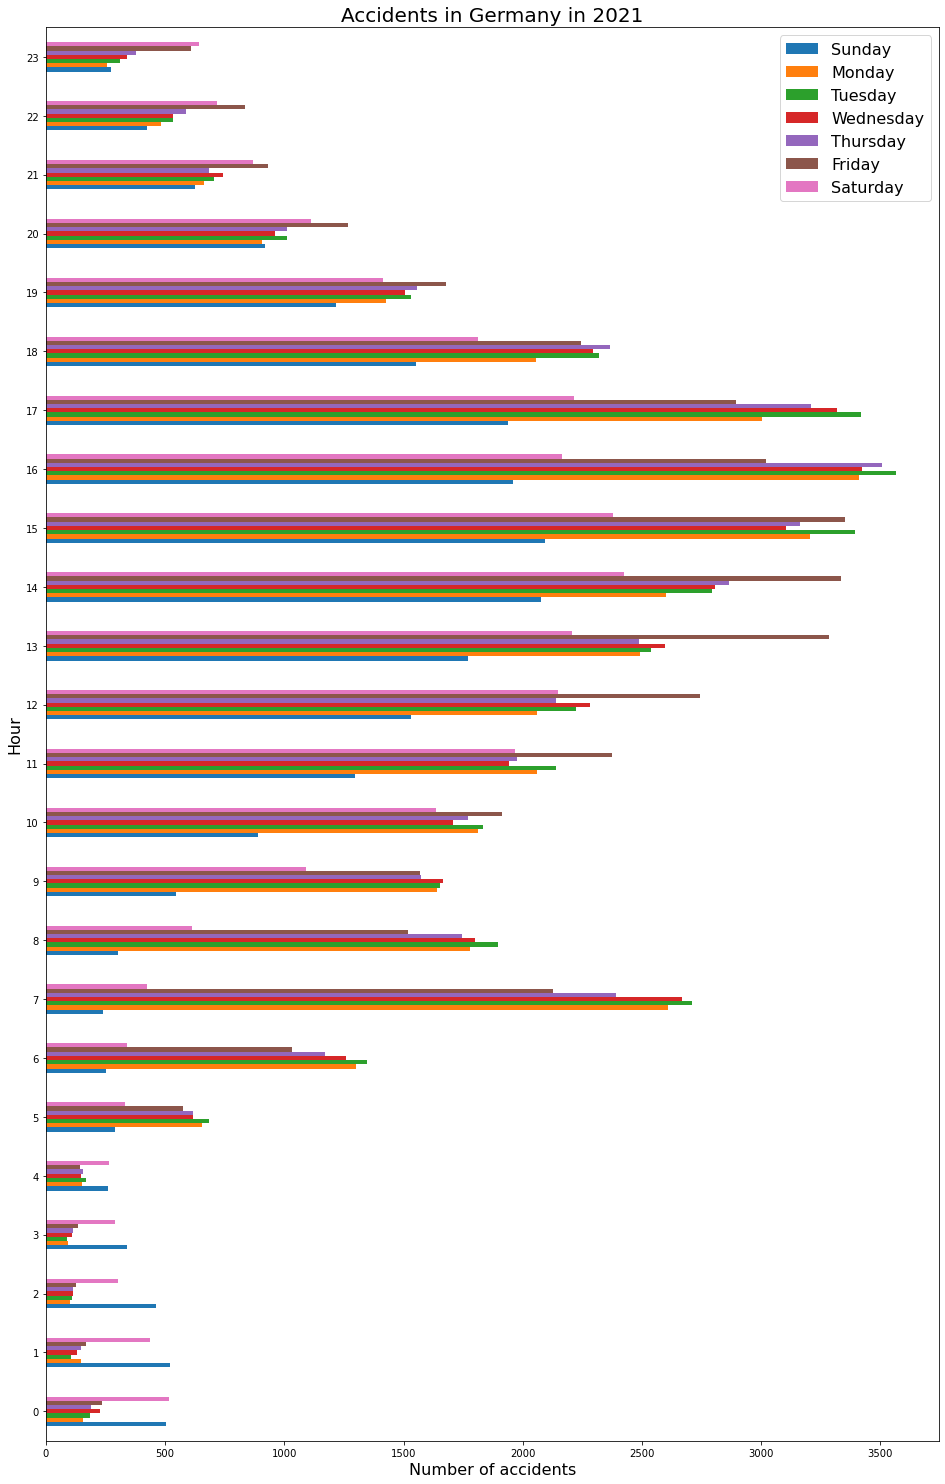

In [22]:
import calendar
accidents_hour_day = data.groupby([data['USTUNDE'],data['UWOCHENTAG']]).count().OBJECTID
accidents_hour_day
accidents_hour_day.unstack().plot(kind='barh', figsize=(16,26))

# title and x,y labels
plt.legend(labels=["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"],fontsize=16)
plt.title('Accidents in Germany in 2021',fontsize=20)
plt.xlabel('Number of accidents',fontsize=16)
plt.ylabel('Hour',fontsize=16);

# Conclusion: As we can easily observe,Friday seems to most accidnet prone day from 10:00 to 16:00 and from 19:00 to 22:00. From midnight to 4:00 am, sunday and saturday are the most dangeous day.

# 6. Location analysis of the accidents causing death

In [23]:
import folium

# Define a map centered around Germany
germany_map = folium.Map(location=[51.1657, 10.4515], zoom_start=6)

# Display the map
germany_map

In [24]:

# Display only accidents where serious injuries where recorded
for lat, lng, label in zip(data_death.YGCSWGS84, data_death.XGCSWGS84, data_death.UKATEGORIE.astype(str)):
    folium.features.CircleMarker(
            [lat, lng],
            radius=4,
            color='red',
            fill=True,
            popup=label,
            fill_color='darkred',
            fill_opacity=0.6
        ).add_to(germany_map)
    
# Show map
germany_map

## Grouping accidents into clusters.

In [25]:
from folium import plugins

# Instantiate a mark cluster object for the car accidents
germany_accident_cluster = folium.Map(location=[51.1657, 10.4515], zoom_start=6)

accidents = plugins.MarkerCluster().add_to(germany_accident_cluster)

# Display only accidents where serious injuries where recorded
for lat, lng, label in zip(data_death.YGCSWGS84, data_death.XGCSWGS84, data_death.UKATEGORIE.astype(str)):
    folium.Marker(
            location=[lat, lng],
            icon=None,
            popup=label,
        ).add_to(accidents)

# Display map
germany_accident_cluster

##  Creating HeatMap with time.
##  Displaying the intensity of accidents in different locations during each hour of the day.

In [26]:
from folium.plugins import HeatMapWithTime

# Create a map object of the city of Germany
germany_heatmap= folium.Map(location=[51.1657, 10.4515], zoom_start=6)

# Nested list that contains the latitude and the longitude of the accidents causing deaths 
hour_list = [[] for _ in range(24)]
for lat,log,hour in zip(data_death.YGCSWGS84, data_death.XGCSWGS84,data_death.USTUNDE):
    hour_list[hour].append([lat,log]) 

# Labels indicating the hours
index = [str(i)+' Hours' for i in range(24)]

# Instantiate a heat map wiht time object for the accidents
HeatMapWithTime(hour_list, index).add_to(germany_heatmap)

germany_heatmap

## Conclusion: As time progresses from midnight, the frequency of accidents casuing deaths grows after 8:00 until 17:00.